# \[expt 05\]: \<expt_title\>

## Introduction

...

...

...

## Background

...

...

...

## Implementation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [16]:
def img_to_mexican_hat(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return sobel_combined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 860.5, 492.5, -0.5)

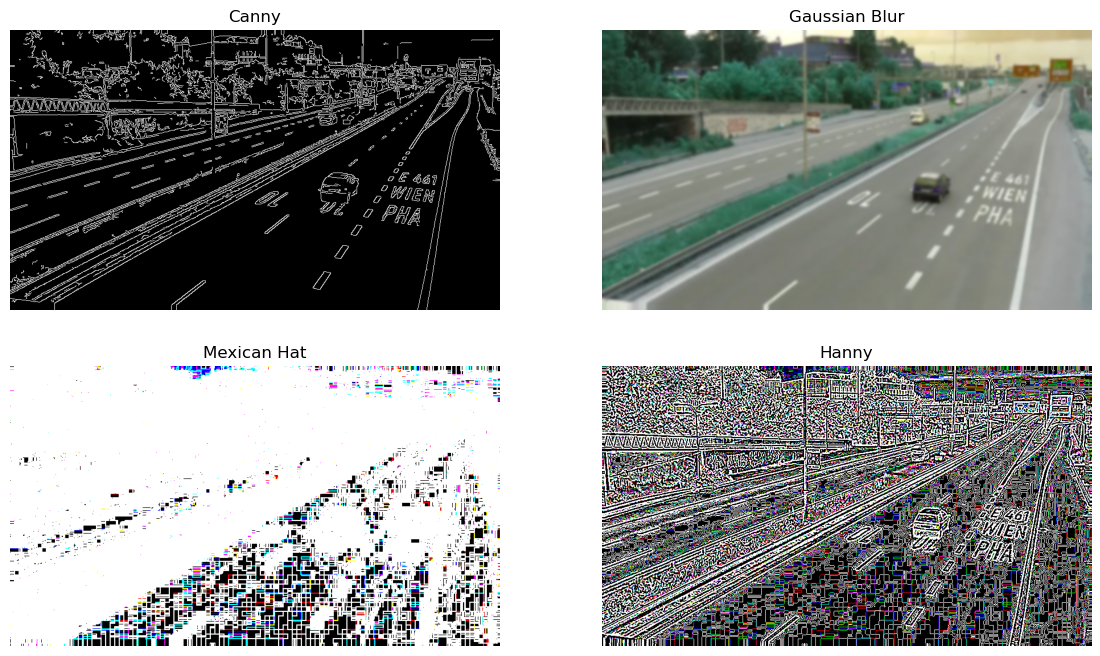

In [21]:
img = cv2.imread("../dataset/frames/train/00012/00012_1560.jpg")
img_canny = cv2.Canny(img, 100, 200)
img_blur = cv2.GaussianBlur(img, (13,13), 0)
img_mexican_hat = img_to_mexican_hat(img)
img_hanny = cv2.Laplacian(cv2.GaussianBlur(img, (3, 3), 0), cv2.CV_64F)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.imshow(img_canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_blur)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_mexican_hat, cmap='gray')
plt.title('Mexican Hat')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_hanny, cmap='gray')
plt.title('Hanny')
plt.axis('off')

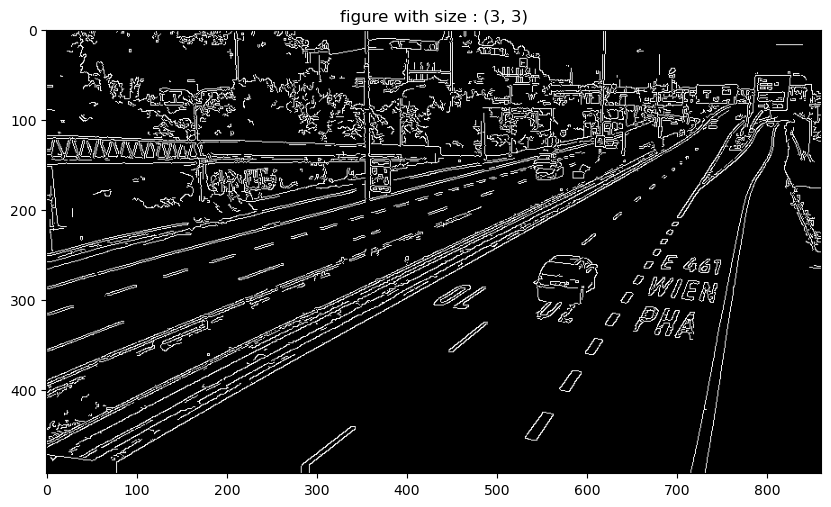

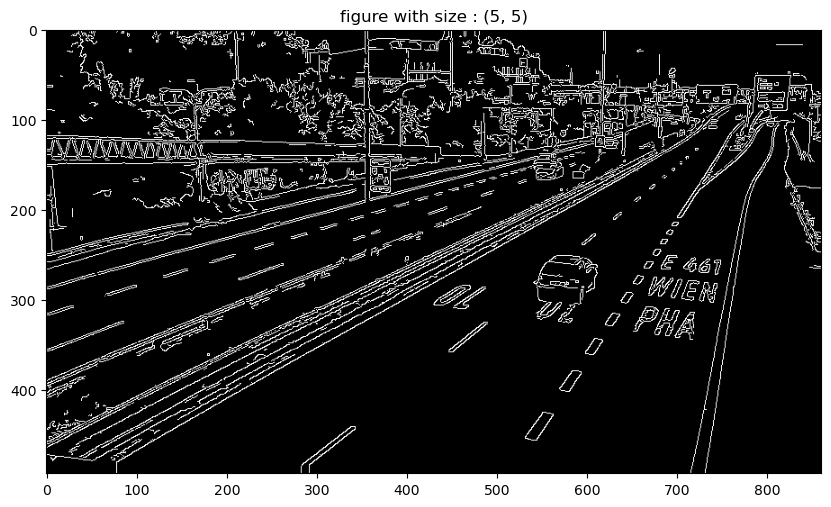

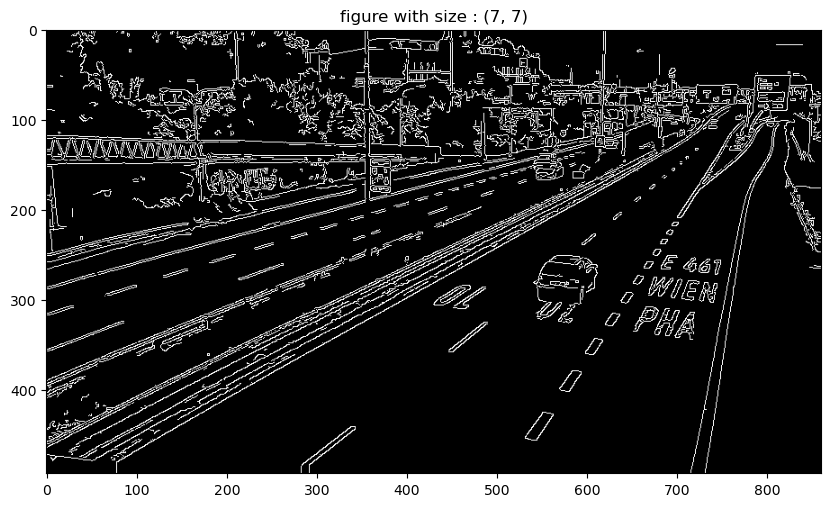

In [26]:
def compute_metrics(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    edge_density = len(contours)
    
    total_length = 0
    for contour in contours:
        total_length += cv2.arcLength(contour, closed=True)
    edge_length = total_length
    
    return edge_density, edge_length


kernel_sizes = [3, 5, 7]

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for kernel_size in kernel_sizes:
    detected_edges = cv2.Canny(img_gray, 100, 200, kernel_size)

    edge_density, edge_length = compute_metrics(detected_edges)
    print(f"Kernel size: {kernel_size}, Edge Density: {edge_density}, Edge Length: {edge_length}")
    
    plt.subplot(3, 1)
    plt.imshow(detected_edges, cmap='gray')
    plt.title(f"figure with size : {kernel_size}")

## Conclusion

...

...

...